<a href="https://colab.research.google.com/github/bida22-070/BIDA22-070/blob/main/Week_6_Introduction_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load the dataset
file_name = 'student-mat.csv'
df = pd.read_csv('/content/student-mat.csv', sep=';')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Columns:")
print(df.columns)
print("\nFirst 5 rows:")
display(df.head())

Dataset Shape: (395, 33)

Dataset Columns:
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

First 5 rows:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Statistical summary
print("\nSummary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Data types
print("\nData Types:")
print(df.dtypes)


Summary Statistics:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000



Missing Values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Duplicate Rows: 0

Data Types:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery    

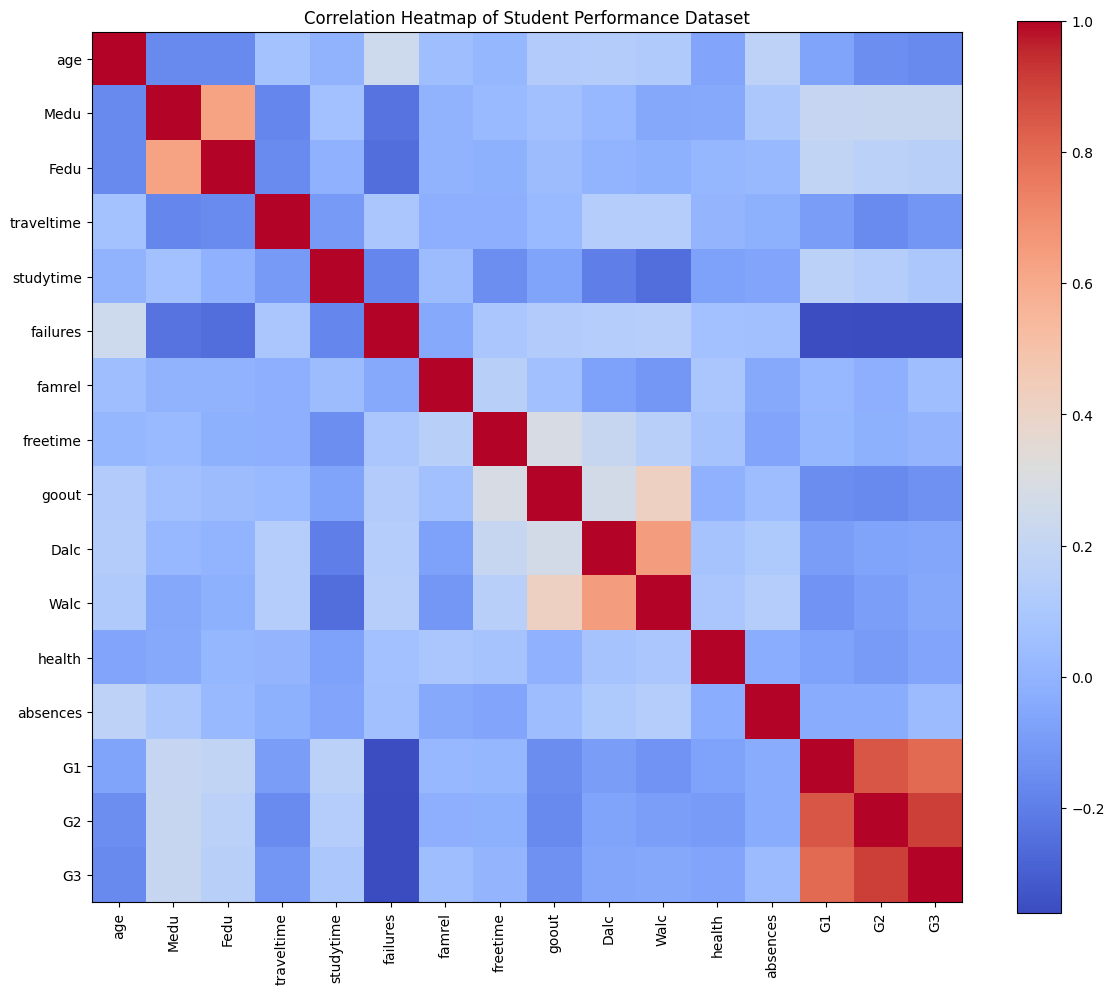


Correlation with G3 (final grade):
G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64


In [ ]:
# Correlation heatmap for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
correlations = numerical_columns.corr()

plt.figure(figsize=(12, 10))
plt.imshow(correlations, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlations)), correlations.columns, rotation=90)
plt.yticks(range(len(correlations)), correlations.columns)
plt.title('Correlation Heatmap of Student Performance Dataset')
plt.tight_layout()
plt.show()

# Display correlation values with G3 (final grade)
print("\nCorrelation with G3 (final grade):")
print(correlations['G3'].sort_values(ascending=False))


Results for feature: G1
Mean Absolute Error: 1.8553
Mean Squared Error: 6.1627
R-squared: 0.6995
Coefficient: 1.1295
Intercept: -2.0239


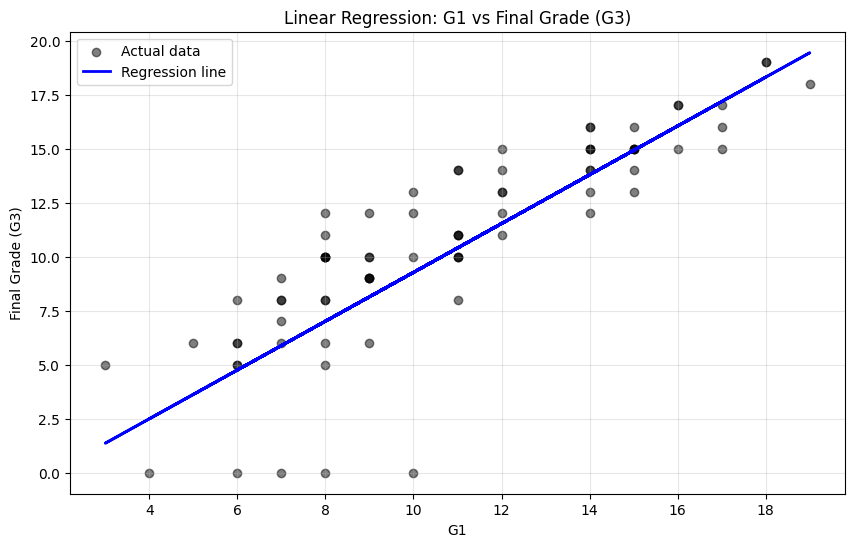


Results for feature: G2
Mean Absolute Error: 1.2087
Mean Squared Error: 4.2162
R-squared: 0.7944
Coefficient: 1.1096
Intercept: -1.4937


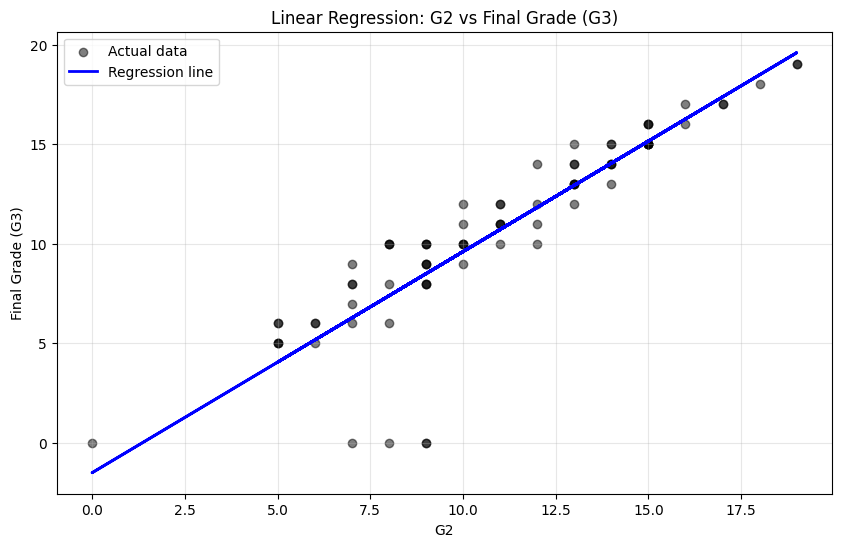


Results for feature: studytime
Mean Absolute Error: 3.6790
Mean Squared Error: 21.4929
R-squared: -0.0482
Coefficient: 0.7586
Intercept: 8.7727


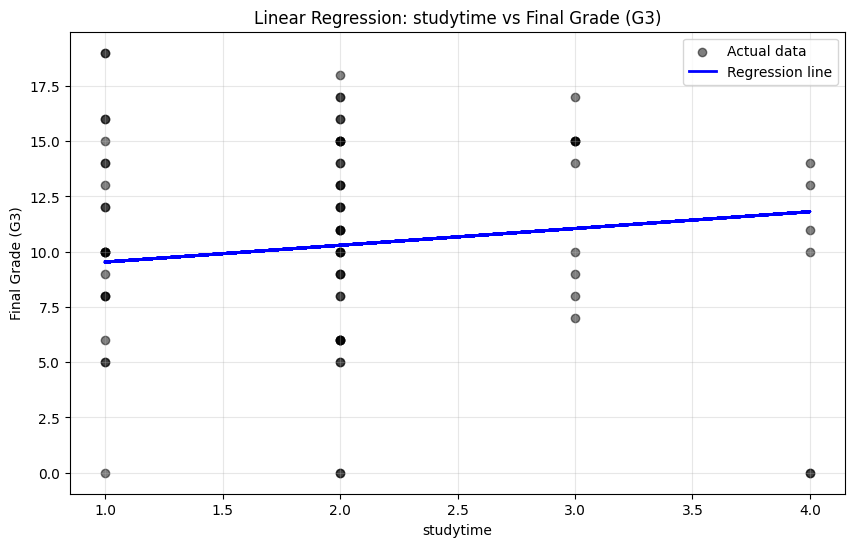


Results for feature: failures
Mean Absolute Error: 3.4755
Mean Squared Error: 18.8756
R-squared: 0.0795
Coefficient: -2.3325
Intercept: 11.1084


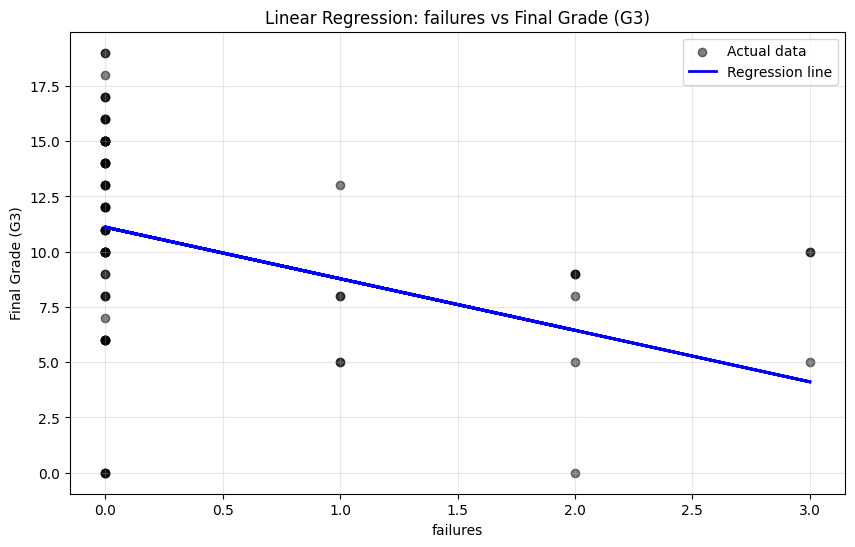


COMPARISON OF SINGLE VARIABLE MODELS
G1: MAE=1.8553, MSE=6.1627, R2=0.6995
G2: MAE=1.2087, MSE=4.2162, R2=0.7944
studytime: MAE=3.6790, MSE=21.4929, R2=-0.0482
failures: MAE=3.4755, MSE=18.8756, R2=0.0795


In [ ]:
def train_single_variable_model(feature_name):
    """Train and evaluate a single variable linear regression model"""

    # Prepare data
    X = df[[feature_name]]
    y = df['G3']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"\nResults for feature: {feature_name}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print(f"Coefficient: {model.coef_[0]:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='black', alpha=0.5, label='Actual data')
    plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Regression line')
    plt.title(f'Linear Regression: {feature_name} vs Final Grade (G3)')
    plt.xlabel(feature_name)
    plt.ylabel('Final Grade (G3)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    return mae, mse, r2

# Test different features
features_to_test = ['G1', 'G2', 'studytime', 'failures']
results = {}

for feature in features_to_test:
    mae, mse, r2 = train_single_variable_model(feature)
    results[feature] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# Compare results
print("\n" + "="*50)
print("COMPARISON OF SINGLE VARIABLE MODELS")
print("="*50)
for feature, metrics in results.items():
    print(f"{feature}: MAE={metrics['MAE']:.4f}, MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")


MODEL 1: ['G1', 'G2']

Results for multi-variable model with features: ['G1', 'G2']
Mean Absolute Error: 1.2622
Mean Squared Error: 4.2119
R-squared: 0.7946

Feature Coefficients:
  G1: 0.1631
  G2: 0.9932
Intercept: -2.0370


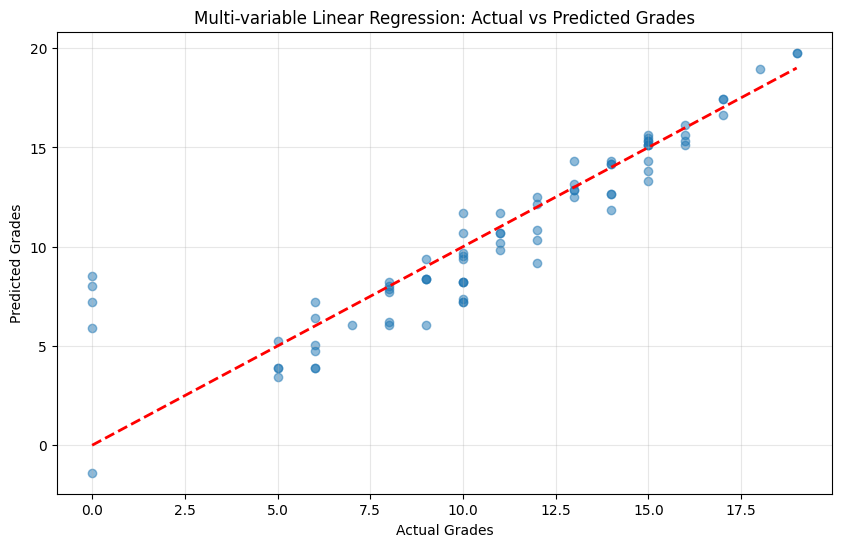


MODEL 2: ['G1', 'G2', 'studytime', 'failures']

Results for multi-variable model with features: ['G1', 'G2', 'studytime', 'failures']
Mean Absolute Error: 1.2916
Mean Squared Error: 4.4761
R-squared: 0.7817

Feature Coefficients:
  G1: 0.1462
  G2: 0.9788
  studytime: -0.0826
  failures: -0.4459
Intercept: -1.3801


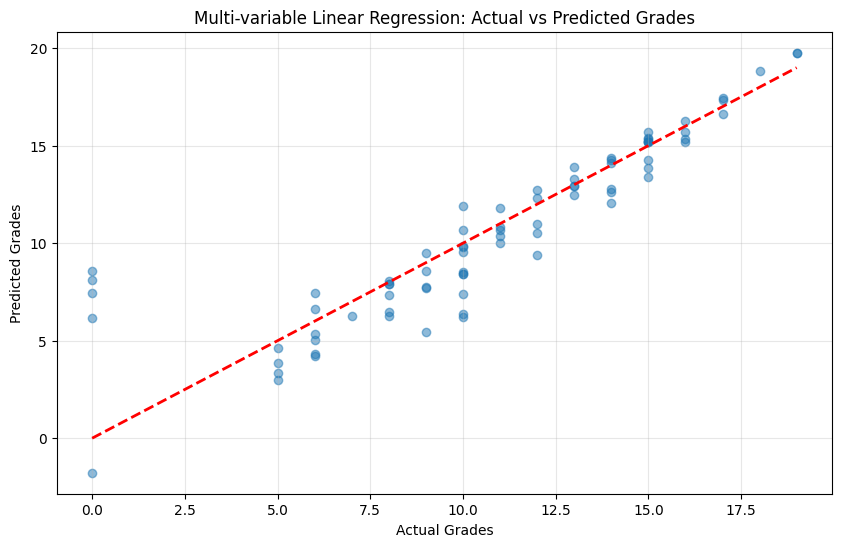


MODEL 3: ['G1', 'G2', 'age', 'traveltime', 'studytime', 'failures']

Results for multi-variable model with features: ['G1', 'G2', 'age', 'traveltime', 'studytime', 'failures']
Mean Absolute Error: 1.2901
Mean Squared Error: 4.5255
R-squared: 0.7793

Feature Coefficients:
  G1: 0.1517
  G2: 0.9770
  age: -0.1265
  traveltime: 0.1860
  studytime: -0.0545
  failures: -0.4007
Intercept: 0.3584


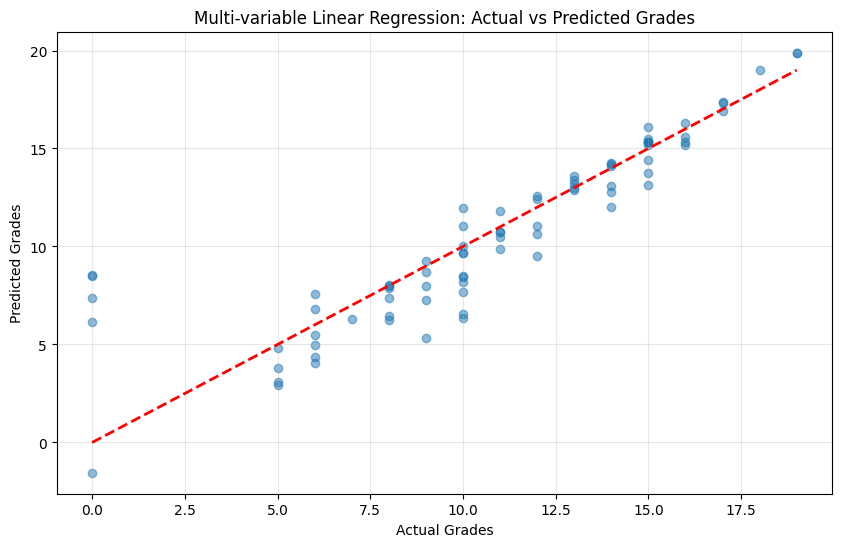


FINAL COMPARISON: SINGLE VS MULTI-VARIABLE MODELS

SINGLE VARIABLE MODELS:
  G1: R2=0.6995
  G2: R2=0.7944
  studytime: R2=-0.0482
  failures: R2=0.0795

MULTI-VARIABLE MODELS:
  Model_1 (G1, G2): R2=0.7946
  Model_2 (G1, G2, studytime, failures): R2=0.7817
  Model_3 (G1, G2, age, traveltime, studytime, failures): R2=0.7793


In [ ]:
def train_multi_variable_model(features_list):
    """Train and evaluate a multi-variable linear regression model"""

    # Prepare data
    X = df[features_list]
    y = df['G3']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"\nResults for multi-variable model with features: {features_list}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Print coefficients
    print("\nFeature Coefficients:")
    for feature, coef in zip(features_list, model.coef_):
        print(f"  {feature}: {coef:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")

    # Plot predicted vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Grades')
    plt.ylabel('Predicted Grades')
    plt.title('Multi-variable Linear Regression: Actual vs Predicted Grades')
    plt.grid(True, alpha=0.3)
    plt.show()

    return mae, mse, r2

# Test different feature combinations
feature_combinations = [
    ['G1', 'G2'],
    ['G1', 'G2', 'studytime', 'failures'],
    ['G1', 'G2', 'age', 'traveltime', 'studytime', 'failures']
]

multi_results = {}
for i, features in enumerate(feature_combinations):
    print(f"\n{'='*60}")
    print(f"MODEL {i+1}: {features}")
    print('='*60)
    mae, mse, r2 = train_multi_variable_model(features)
    multi_results[f"Model_{i+1}"] = {'MAE': mae, 'MSE': mse, 'R2': r2, 'Features': features}

# Compare all models
print("\n" + "="*80)
print("FINAL COMPARISON: SINGLE VS MULTI-VARIABLE MODELS")
print("="*80)

print("\nSINGLE VARIABLE MODELS:")
for feature, metrics in results.items():
    print(f"  {feature}: R2={metrics['R2']:.4f}")

print("\nMULTI-VARIABLE MODELS:")
for model_name, metrics in multi_results.items():
    print(f"  {model_name} ({', '.join(metrics['Features'])}): R2={metrics['R2']:.4f}")

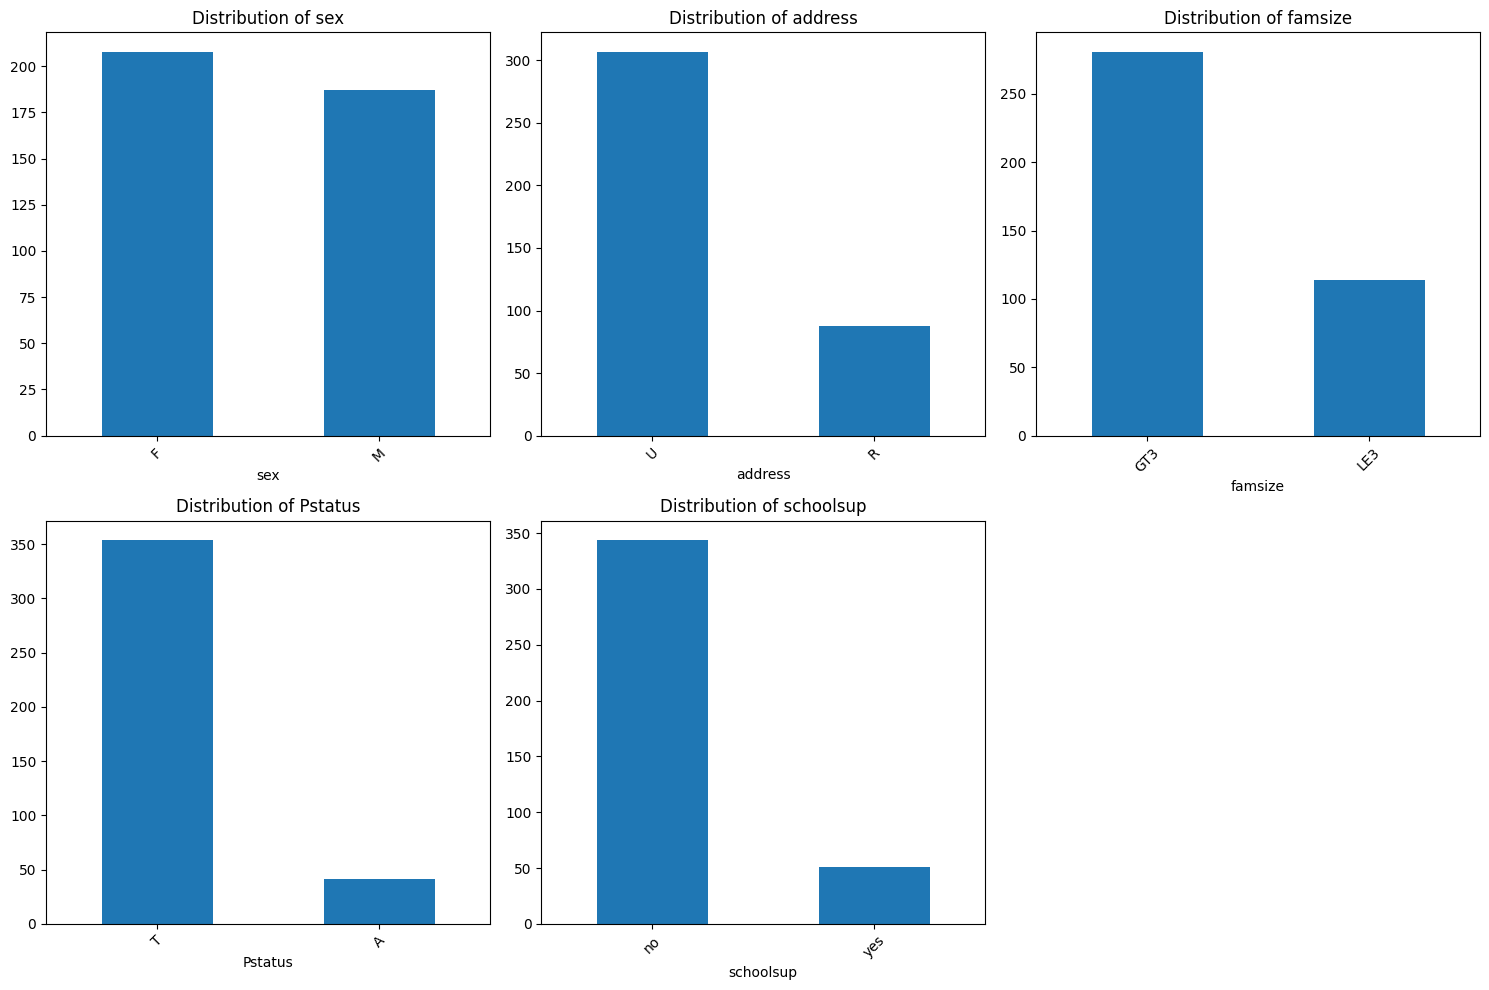

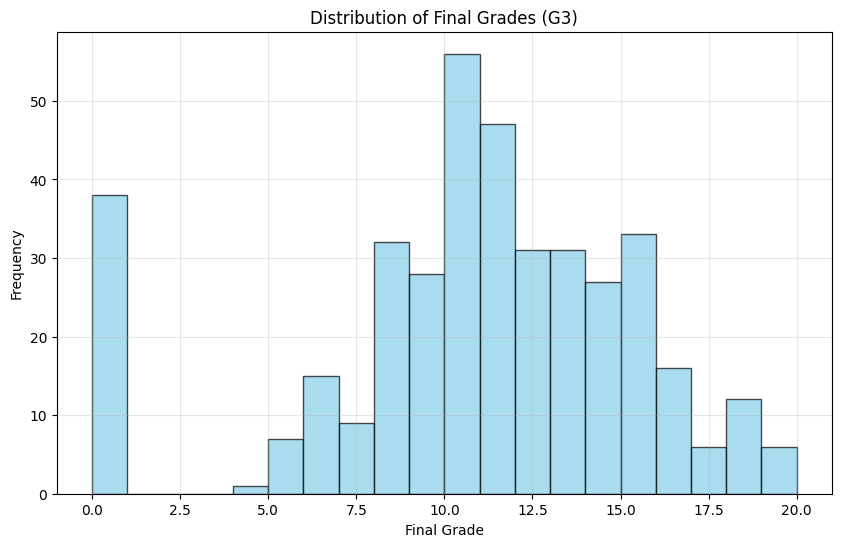

In [ ]:
# Distribution of categorical variables
categorical_vars = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup']

plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars[:5], 1):
    plt.subplot(2, 3, i)
    df[var].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Histogram of final grades
plt.figure(figsize=(10, 6))
plt.hist(df['G3'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()